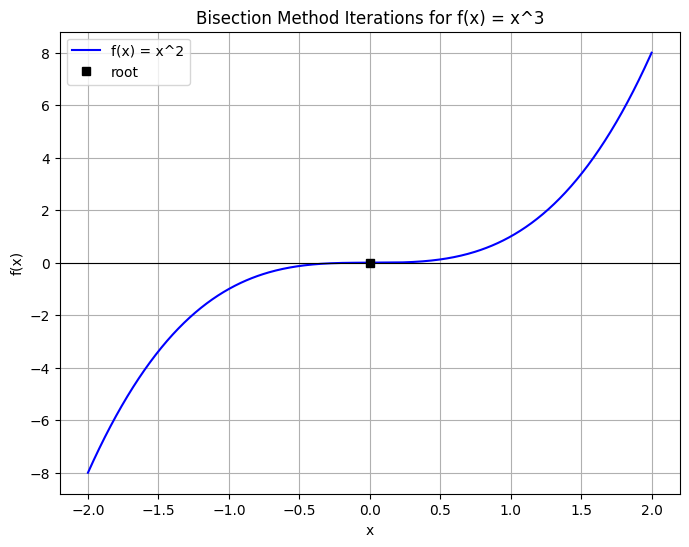

177


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3

a, b = -10**50,10**49
tolerance = 1e-3
max_iter = 10000

iterations = []

for i in range(max_iter):
    c = (a + b)/2
    # print(c)
    iterations.append((a, b, c))

    if f(c) == 0 or (b - a)/2 < tolerance:
        break

    if f(a) * f(c) < 0:
        b = c
    else:
        a = c

x = np.linspace(-2, 2, 400)
y = f(x)

plt.figure(figsize=(8,6))
plt.plot(x, y, label='f(x) = x^2', color='blue')
plt.axhline(0, color='black', linewidth=0.8)
plt.plot(0,0,'ks', label='root')

plt.title('Bisection Method Iterations for f(x) = x^3')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
print(len(iterations))


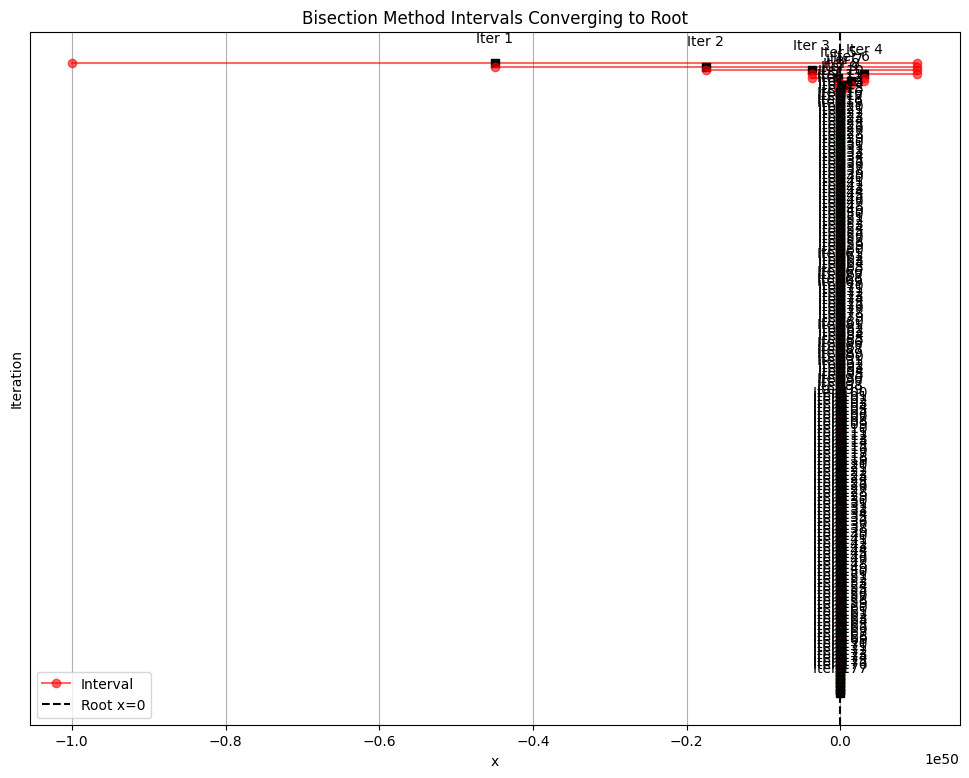

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a, b = -10**50,10**49
tolerance = 1e-3
max_iter = 177

iterations = []

for i in range(max_iter):
    c = (a + b)/2
    # print('a equals: ',a)
    # print('b equals: ',b)
    # print('c equals: ',c)
    # print('')
    iterations.append((a, b, c))

    if f(c) == 0 or (b - a)/2 < tolerance:
        break

    if f(a) * f(c) < 0:
        b = c
    else:
        a = c

plt.figure(figsize=(12,9))

y_levels = np.linspace(1, 0.1, len(iterations))
for i, ((a_i, b_i, c_i), y_i) in enumerate(zip(iterations, y_levels), 1):
    plt.plot([a_i, b_i], [y_i, y_i], 'ro-', alpha=0.6, label='Interval' if i==1 else "")
    plt.plot(c_i, y_i, 'ks')
    plt.text(c_i, y_i+0.03, f'Iter {i}', ha='center')

plt.axvline(0, color='black', linestyle='--', label='Root x=0')
plt.title('Bisection Method Intervals Converging to Root')
plt.xlabel('x')
plt.ylabel('Iteration')
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def f(x):
    return x**3

def fp(x):
  return 3*x**2

def Newton(x0,f,f_prime, tol, eps, max_it, itc = 0):
  history = []
  for _ in range(max_it):
    y = f(x0)
    itc += 1
    yprime = f_prime(x0)

    if abs(yprime)<eps:
      return x0, history

    x1 = x0 - y / yprime
    error = abs(x1-x0)

    history.append({
            "iteration": itc,
            "x_n": x0,
            "f_xn": y,
            "f_prime_xn": yprime,
            "x_next": x1,
            "error": error
        })

    if abs(x1-x0) <= tol:

      return x1, history

    x0 = x1
    print(x0)

# ans, itc = Newton(1000000000000, f, fp, 1e-3, 1e-10, 100)

# print(ans)
# print(itc)

In [ ]:
from math import *
def g(x):
  return atan(x)

def gp(x):
  return 1/(1+x**2)

ans, history = Newton(1.3,g,gp,1e-3,1e-10,100)
print(ans)
for row in history:
    print(
        f"n={row['iteration']:2d}, "
        f"x_n={row['x_n']:.8f}, "
        f"f(x_n)={row['f_xn']:.3e}, "
        f"f'(x_n)={row['f_prime_xn']:.3e}, "
        f"x_(n+1)={row['x_next']:.8f}, "
        f"error={row['error']:.3e}"
    )

-1.16162088448854
0.8588963926230877
-0.37424067175856535
0.03401887344648524
-2.624025442319461e-05
1.2045171040057576e-14
n= 1, x_n=1.30000000, f(x_n)=9.151e-01, f'(x_n)=3.717e-01, x_(n+1)=-1.16162088, error=2.462e+00
n= 2, x_n=-1.16162088, f(x_n)=-8.600e-01, f'(x_n)=4.256e-01, x_(n+1)=0.85889639, error=2.021e+00
n= 3, x_n=0.85889639, f(x_n)=7.096e-01, f'(x_n)=5.755e-01, x_(n+1)=-0.37424067, error=1.233e+00
n= 4, x_n=-0.37424067, f(x_n)=-3.581e-01, f'(x_n)=8.771e-01, x_(n+1)=0.03401887, error=4.083e-01
n= 5, x_n=0.03401887, f(x_n)=3.401e-02, f'(x_n)=9.988e-01, x_(n+1)=-0.00002624, error=3.405e-02
n= 6, x_n=-0.00002624, f(x_n)=-2.624e-05, f'(x_n)=1.000e+00, x_(n+1)=0.00000000, error=2.624e-05


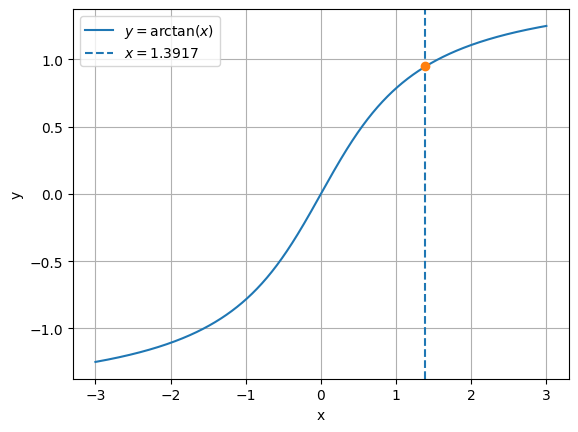

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 1000)
y = np.arctan(x)
x_const = 1.3917

plt.plot(x, y, label=r"$y=\arctan(x)$")
plt.axvline(x=x_const, linestyle="--", label=r"$x=1.3917$")

y_intersect = np.arctan(x_const)
plt.plot(x_const, y_intersect, "o")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

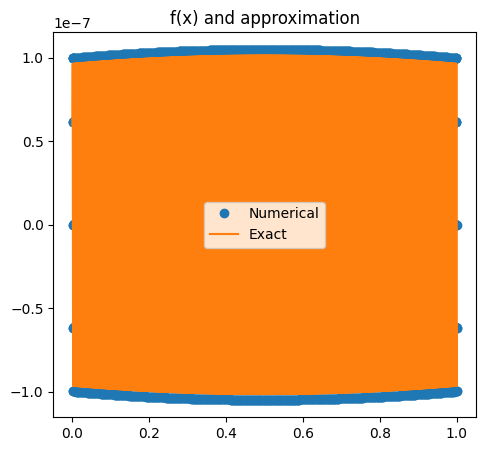

Grid spacing h = 1.99960e-04
Points per wavelength = 10.00
Absolute max error = 3.39879e-09
Relative max error = 3.35447e-02
Relative L2 error  = 3.35447e-02
Relative residual  = 1.33227e-15
Computation time: 7.086148 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

start_time = time.time()

def central_diff_matrix(N, h):
    A = np.zeros((N, N))
    for i in range(N):
        if i > 0:
            A[i, i-1] = 1
        A[i, i] = -2
        if i < N-1:
            A[i, i+1] = 1
    return A / h**2

N = 5000
S = 1000
x = np.linspace(0,1,N+2)  # include boundaries
h = x[1] - x[0]

f_good = (np.pi**2) * np.sin(np.pi * x[1:-1])
A = central_diff_matrix(N, h)
u_good = np.linalg.solve(-A, f_good)

u_exact_good = np.sin(np.pi * x[1:-1])

f_bad = np.sin(S*np.pi*x[1:-1])
u_bad = np.linalg.solve(-A, f_bad)
u_exact_bad = np.sin(S*np.pi*x[1:-1]) / (S*np.pi)**2

plt.figure(figsize=(12,5))

# plt.subplot(1,2,1)
# plt.plot(x[1:-1], u_good, 'o', label='Numerical')
# plt.plot(x[1:-1], u_exact_good, '-', label='Exact')
# plt.title('Good Example: Smooth f(x)')
# plt.legend()

plt.subplot(1,2,2)
plt.plot(x[1:-1], u_bad, 'o', label='Numerical')
plt.plot(x[1:-1], u_exact_bad, '-', label='Exact')
plt.title('f(x) and approximation')
plt.legend()

plt.show()

abs_inf = np.linalg.norm(u_bad - u_exact_bad, np.inf)
abs_L2  = np.sqrt(h) * np.linalg.norm(u_bad - u_exact_bad)

rel_inf = abs_inf / np.linalg.norm(u_exact_bad, np.inf)
rel_L2  = abs_L2  / (np.sqrt(h) * np.linalg.norm(u_exact_bad))

points_per_wavelength = 2 / (S * h)
residual = np.linalg.norm(-A @ u_bad - f_bad, np.inf) / np.linalg.norm(f_bad, np.inf)

print(f"Grid spacing h = {h:.5e}")
print(f"Points per wavelength = {points_per_wavelength:.2f}")
print(f"Absolute max error = {abs_inf:.5e}")
print(f"Relative max error = {rel_inf:.5e}")
print(f"Relative L2 error  = {rel_L2:.5e}")
print(f"Relative residual  = {residual:.5e}")


end_time = time.time()
print(f"Computation time: {end_time - start_time:.6f} seconds")


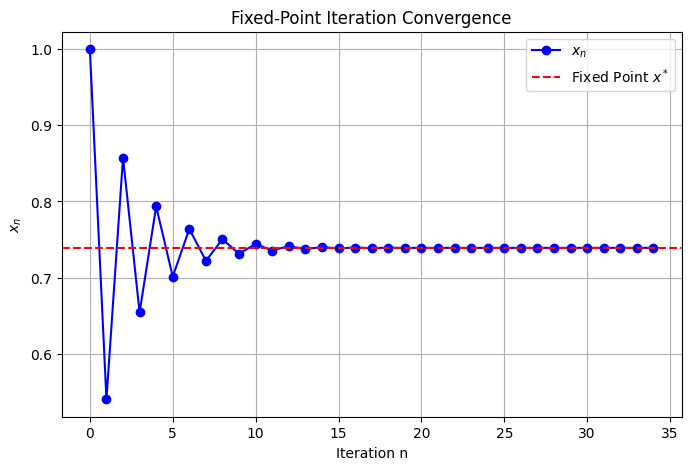

Fixed point: 0.7390855263619245
Progress: [1, 0.5403023058681398, 0.8575532158463934, 0.6542897904977791, 0.7934803587425656, 0.7013687736227565, 0.7639596829006542, 0.7221024250267077, 0.7504177617637605, 0.7314040424225098, 0.7442373549005569, 0.7356047404363474, 0.7414250866101092, 0.7375068905132428, 0.7401473355678757, 0.7383692041223232, 0.7395672022122561, 0.7387603198742113, 0.7393038923969059, 0.7389377567153445, 0.7391843997714936, 0.7390182624274122, 0.7391301765296711, 0.7390547907469174, 0.7391055719265363, 0.7390713652989449, 0.7390944073790913, 0.739078885994992, 0.7390893414033927, 0.7390822985224024, 0.7390870426953322, 0.7390838469650002, 0.7390859996481299, 0.7390845495752126, 0.7390855263619245]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time


def fixed_point_iteration(g, x0, tol=1e-6, max_iter=100):
    x = x0
    history = [x]
    for n in range(1, max_iter + 1):
        x_new = g(x)
        history.append(x_new)
        if abs(x_new - x) < tol:
            return x_new, history
        x = x_new
    return x, history

import math

g = lambda x: math.cos(x)
x0 = 1

x_star, progress = fixed_point_iteration(g, x0)


iterations = list(range(len(progress)))

plt.figure(figsize=(8, 5))
plt.plot(iterations, progress, marker='o', linestyle='-', color='blue', label='$x_n$')
plt.axhline(y=0.7390855263619245, color='red', linestyle='--', label='Fixed Point $x^*$')
plt.xlabel('Iteration n')
plt.ylabel('$x_n$')
plt.title('Fixed-Point Iteration Convergence')
plt.legend()
plt.grid(True)
plt.show()

print("Fixed point:", x_star)
print("Progress:", progress)


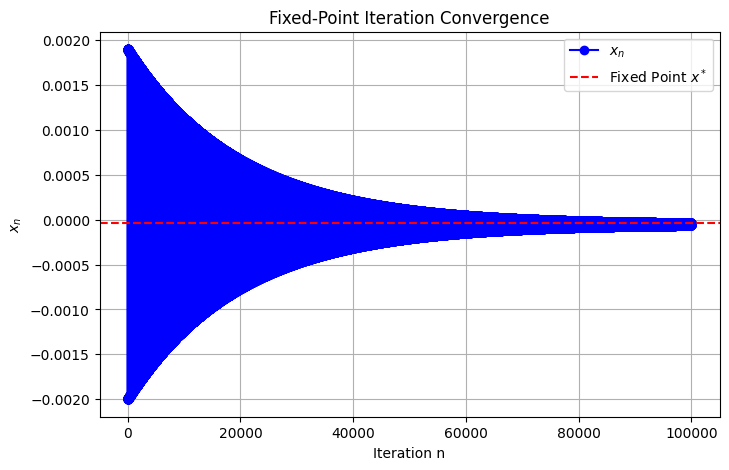

Fixed point: -3.69109270283996e-05
Progress: [-0.002, 0.001898001332666932, -0.001999803677300127, 0.0018978054022008584, -0.001999607374623791, 0.0018976094916798303, -0.0019994110919689945, 0.0018974136011019604, -0.0019992148293335177, 0.0018972177304649174, -0.001999018586715362, 0.0018970218797667027, -0.001998822364112307, 0.001896826049005318, -0.0019986261615221323, 0.0018966302381783207, -0.0019984299789428395, 0.0018964344472839345, -0.00199823381637243, 0.00189623867632005, -0.0019980376738086836, 0.0018960429252844468, -0.0019978415512493797, 0.0018958471941750155, -0.00199764544869252, 0.0018956514829896465, -0.001997449366135884, 0.0018954557917263415, -0.001997253303577473, 0.00189526012038288, -0.001997057261015067, 0.0018950644689572638, -0.0019968612384466677, 0.0018948688374472722, -0.0019966652358700543, 0.001894673225850907, -0.0019964692532832284, 0.0018944776341661695, -0.0019962732906839697, 0.0018942820623907286, -0.00199607734807028, 0.0018940865105228077, -0.

In [ ]:
import matplotlib.pyplot as plt
import math
def fixed_point_iteration(g, x0, tol=1e-10, max_iter=100001):
    x = x0
    history = [x]
    for n in range(1, max_iter + 1):
        x_new = g(x)
        history.append(x_new)
        if abs(x_new - x) < tol:
            return x_new, history
        x = x_new
    return x, history


epsilon = 10**-4
g = lambda x: 1-epsilon-math.exp(x)
x0 = -0.002
x_star, progress = fixed_point_iteration(g, x0)


iterations = list(range(len(progress)))

plt.figure(figsize=(8, 5))
plt.plot(iterations, progress, marker='o', linestyle='-', color='blue', label='$x_n$')
plt.axhline(y=x_star, color='red', linestyle='--', label='Fixed Point $x^*$')
plt.xlabel('Iteration n')
plt.ylabel('$x_n$')
plt.title('Fixed-Point Iteration Convergence')
plt.legend()
plt.grid(True)
plt.show()

print("Fixed point:", x_star)
print("Progress:", progress)
print(progress[-1])
print(len(progress))

x_exact = progress[-1]
x_estimate = g(x0)
relative_error = abs(abs(x_estimate)-(x_exact))/abs(x_exact)
print(relative_error*100)

epsilon = 10 ** -1
epsilon_list = []
error_list = []

for i in range(10):
  epsilon = epsilon / 10
  epsilon_list.append(epsilon)
  g = lambda x: 1-epsilon-math.exp(x)
  x_star, progress = fixed_point_iteration(g, x0)
  x_exact = progress[-1]
  x_estimate = g(x0)
  relative_error = abs((x_exact)-(x_estimate))/abs(x_exact)
  error_list.append(relative_error*100)
print(epsilon_list)
print(error_list)



Uniform mesh error:   0.11307053213563827
Shishkin mesh error:  0.026324863368718088


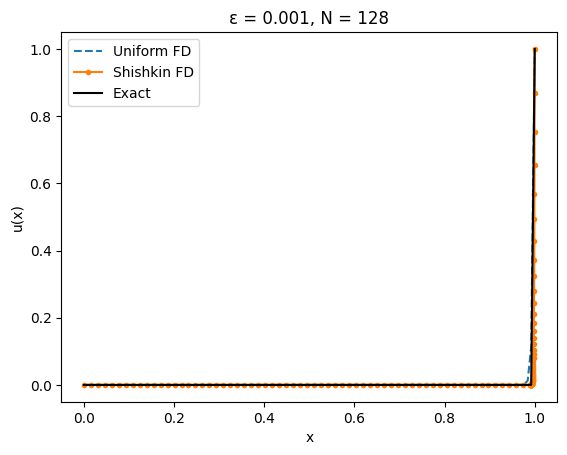

In [ ]:
# shiskin

import numpy as np
import matplotlib.pyplot as plt



def exact_solution(x, eps):
    return (np.exp((x-1)/eps) - np.exp(-1/eps)) / (1.0 - np.exp(-1/eps))



def solve_uniform_fd(N, eps):
    h = 1.0 / N
    x = np.linspace(0, 1, N+1)

    A = np.zeros((N-1, N-1))
    b = np.zeros(N-1)

    for i in range(N-1):
        A[i, i] = 2*eps/h**2 + 1/h
        if i > 0:
            A[i, i-1] = -eps/h**2 - 1/h
        if i < N-2:
            A[i, i+1] = -eps/h**2

    # boundary condition at x=1
    b[-1] += eps/h**2

    u_inner = np.linalg.solve(A, b)

    u = np.zeros(N+1)
    u[1:N] = u_inner
    u[N] = 1.0

    return x, u

def shishkin_mesh(N, eps):
    sigma = min(0.5, 2*eps*np.log(N))
    N1 = N // 2
    N2 = N - N1

    x1 = np.linspace(0, 1-sigma, N1+1)
    x2 = np.linspace(1-sigma, 1, N2+1)[1:]

    return np.concatenate((x1, x2))

def solve_shishkin_fd(N, eps):
    x = shishkin_mesh(N, eps)
    h = np.diff(x)

    A = np.zeros((N-1, N-1))
    b = np.zeros(N-1)

    for i in range(1, N):
        hL = h[i-1]
        hR = h[i] if i < N else h[-1]

        idx = i-1

        A[idx, idx] = eps*(1/hL + 1/hR)/(0.5*(hL + hR)) + 1/hL

        if idx > 0:
            A[idx, idx-1] = -eps/(hL*0.5*(hL + hR)) - 1/hL
        if idx < N-2:
            A[idx, idx+1] = -eps/(hR*0.5*(hL + hR))

    b[-1] += eps/(h[-1]*0.5*(h[-2] + h[-1]))

    u_inner = np.linalg.solve(A, b)

    u = np.zeros(N+1)
    u[1:N] = u_inner
    u[N] = 1.0

    return x, u

def max_error(x, u, eps):
    return np.max(np.abs(u - exact_solution(x, eps)))

eps = 1e-3
N = 128

x_u, u_u = solve_uniform_fd(N, eps)
x_s, u_s = solve_shishkin_fd(N, eps)

err_uniform = max_error(x_u, u_u, eps)
err_shishkin = max_error(x_s, u_s, eps)

print("Uniform mesh error:  ", err_uniform)
print("Shishkin mesh error: ", err_shishkin)

plt.plot(x_u, u_u, '--', label='Uniform FD')
plt.plot(x_s, u_s, '-o', label='Shishkin FD', markersize=3)
plt.plot(x_u, exact_solution(x_u, eps), 'k', label='Exact')
plt.legend()
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title(f"ε = {eps}, N = {N}")
plt.show()



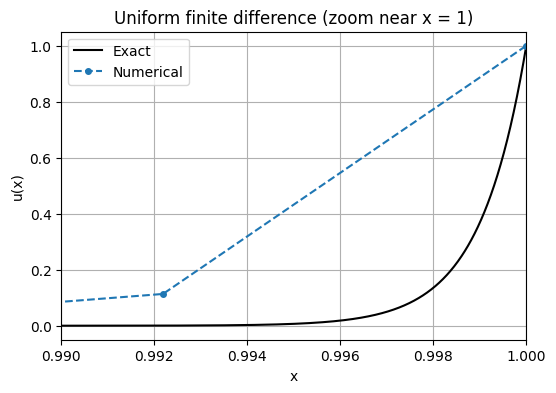

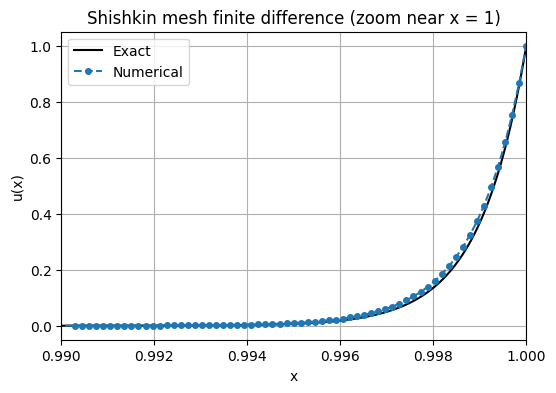

In [ ]:
def plot_zoom(x, u, eps, title):
    x_exact = np.linspace(1 - 10*eps, 1, 1000)
    u_exact = exact_solution(x_exact, eps)

    plt.figure(figsize=(6,4))
    plt.plot(x_exact, u_exact, 'k', label='Exact')
    plt.plot(x, u, 'o--', markersize=4, label='Numerical')

    plt.xlim(1 - 10*eps, 1)
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

eps = 1e-3
N = 128

x_u, u_u = solve_uniform_fd(N, eps)
x_s, u_s = solve_shishkin_fd(N, eps)

plot_zoom(x_u, u_u, eps, "Uniform finite difference (zoom near x = 1)")
plot_zoom(x_s, u_s, eps, "Shishkin mesh finite difference (zoom near x = 1)")


Shishkin Meshes in the Numerical Solution of Singularly Perturbed Differential Equations, Natalia Kopteva & Eugene